In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #for reading images
import cv2 #computer vision libirary
%matplotlib qt

!pip install opencv-python

In [16]:
image=mpimg.imread('driven cars.jpg')

In [17]:
#height, width and 3 arrays
image.shape

(1598, 2131, 3)

In [18]:
#change from color to grayscale
gray_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [19]:
gray_image.shape

(1598, 2131)

In [20]:
plt.imshow(gray_image,cmap='gray')

In [21]:
#print specific grayscale pixel values
x=190
y=375
pixel_val=gray_image[y,x]
print(pixel_val)

153


### I Can many many operation on that images...

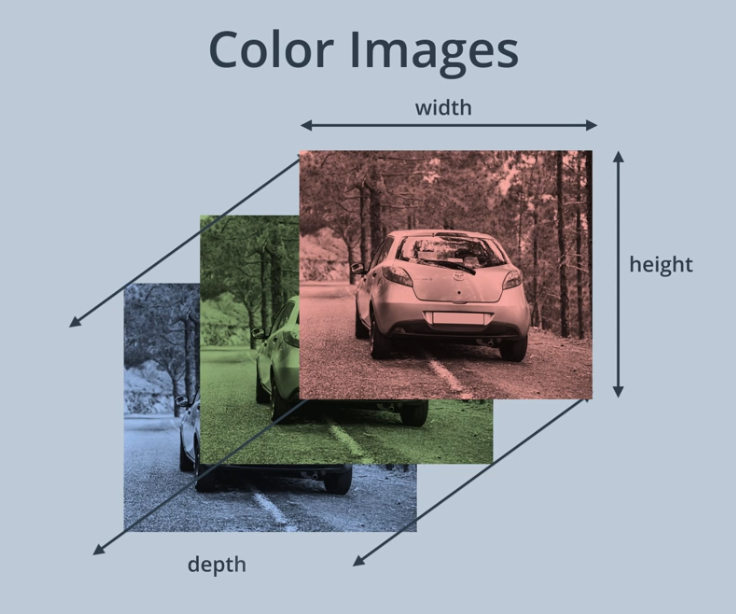

# Isolate images 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [14]:
image=cv2.imread('balance.jpg')

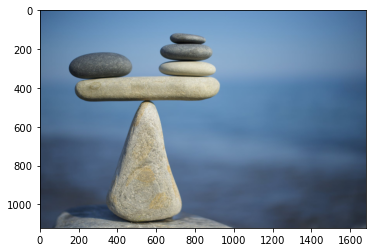

In [15]:
#make a copy of an image
image_copy=np.copy(image)

#change color from RGB to BGR
image_copy=cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

# plot color channels

In [16]:
#rgb
#:,:, mean get all columns and rows
r=image_copy[:,:,0]
g=image_copy[:,:,1]
b=image_copy[:,:,2]

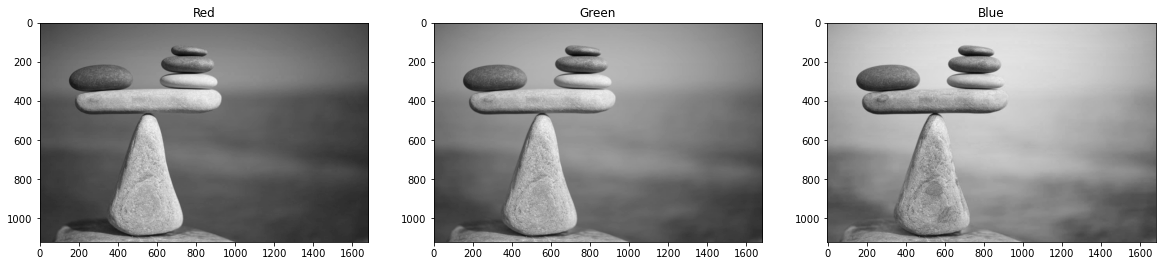

In [17]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))
ax1.set_title('Red')
ax1.imshow(r,cmap='gray')

ax2.set_title('Green')
ax2.imshow(g,cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b,cmap='gray')

In [18]:
#change color from bgr to hsv
hsv=cv2.cvtColor(image_copy,cv2.COLOR_BGR2HSV)

In [19]:
#rgb
#:,:, mean get all columns and rows
h=hsv[:,:,0]
s=hsv[:,:,1]
v=hsv[:,:,2]

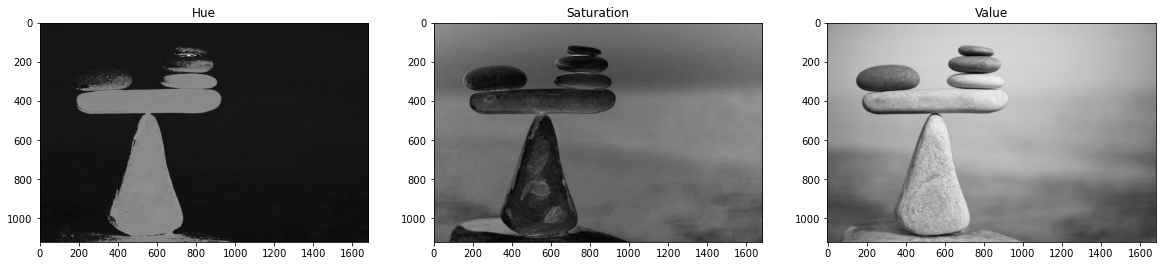

In [20]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))
ax1.set_title('Hue')
ax1.imshow(h,cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s,cmap='gray')

ax3.set_title('Value')
ax3.imshow(v,cmap='gray')

# Define color selection threshold

In [21]:
#define color selection criteria in rgb values
lower_gray=np.array([180,100,100])
upper_gray=np.array([255,255,230])

In [22]:
#define color selection criteria in hsv values
lower_hue=np.array([160,0,0])
upper_hue=np.array([180,255,255])

# Mask the image

Text(0.5, 1.0, 'RGB selection')

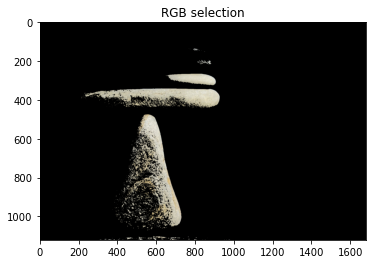

In [23]:
#rgb mask

#define the masked area

make_rgb=cv2.inRange(image_copy,lower_gray,upper_gray)

#create an copy mask of the image 
masked_image=np.copy(image_copy)
masked_image[make_rgb==0]=[0,0,0]

plt.imshow(masked_image)
plt.title('RGB selection')

Text(0.5, 1.0, 'HUE selection')

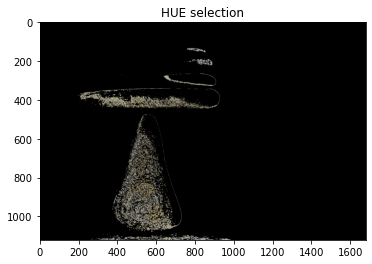

In [24]:
#rgb mask

#define the masked area

make_rgb=cv2.inRange(image_copy,lower_hue,upper_hue)

#create an copy mask of the image 
masked_image=np.copy(image_copy)
masked_image[make_rgb==0]=[0,0,0]

plt.imshow(masked_image)
plt.title('HUE selection')

### HUE are more valuable in selecting an area under varing light conditions

# Day and night classfier eg. in self driven car to open the front light

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #for reading images
import cv2 #computer vision libirary
#import helpers
%matplotlib qt

In [5]:
image_dir_trainning="day_night_images/trainning/"
image_dir_test="day_night_images/test/"

## load dataset

In [6]:
#using load dataset function in helpers.py
#IMAGE_LIST=helpers.load_dataset(image_dir_trainning)

# Construct a STANDRAIZED_LIST  of input images and output labels.

In [7]:
#this function take a list of image-label pairs and output standralized list of resized images and numeric labels
#STANDARLIZED_LIST=helpers.standrlize(IMAGE_LIST)

# Visualize the standard data

In [ ]:
#display the standard images and it's labels

#select and image by index
image_num=0
selected_image=STANDARLIZED_LIST[image_num][0]
selected_label=STANDARLIZED_LIST[image_num][1]

#display the image and it's output

plt.imshow(selected_image)
print("Shape"+str(selected_image.shape))
print("label[1=Day, 0=Night]:"+str(selected_label))

# Create a Feature Extraction function

        Create a feature extraction function respresents the brightness in an image. we will be extracting the average brightness using HSV color space.
    Specially, we will use the V channel( a measurable brighntess),add up the pixel values in the V channel, then divide the sum by the area of the image to get the average value of the image.

In [25]:
image=cv2.imread('balance.jpg')

In [26]:
#change color from bgr to rgb
rgb=cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

In [27]:
#change color from bgr to hsv
hsv=cv2.cvtColor(image_copy,cv2.COLOR_BGR2HSV)

In [28]:
#rgb
#:,:, mean get all columns and rows
h=hsv[:,:,0]
s=hsv[:,:,1]
v=hsv[:,:,2]

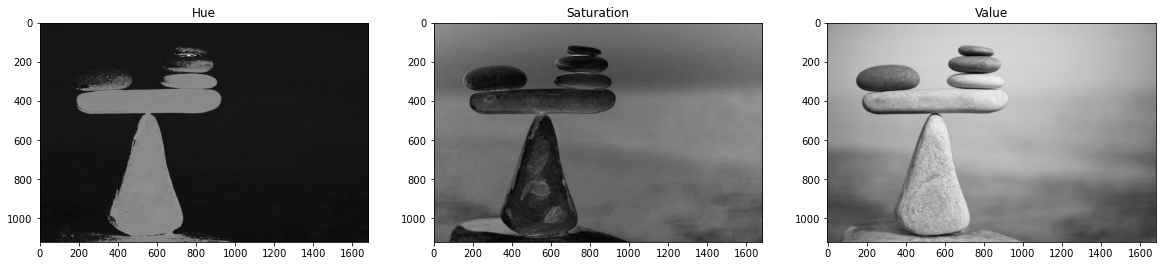

In [29]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))
ax1.set_title('Hue')
ax1.imshow(h,cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s,cmap='gray')

ax3.set_title('Value')
ax3.imshow(v,cmap='gray')

In [30]:
#find the average value of an image
def avg_brightness(rgb_image):
    #convert the image to hsv
    hsv=cv2.cvtColor(rgb_image,cv2.COLOR_RGB2HSV)
    #ADD UP ALL THE PIXEL VALUES IN THE V CHANNEL
    sum_brightness=np.sum(hsv[:,:,2])
    #calculate the are
    area=1000*1600#pixel
    #find the avg brigtness
    avg=sum_brightness/area
    return avg

#look at day and night images and their  avg brightness
image=cv2.imread('balance.jpg')
#change color from bgr to rgb
test_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
avg=avg_brightness(test_image)
print("AVG Brightness:"+str(avg))
plt.imshow(test_image)

# Classification sthm like if statement

take a standrlaized image and return a predicted label

In [ ]:
def estimate_label(rgb_image):
    avg=avg_brightness(rgb)
    threshold=100
    predicted_label=0
    if(avg>100):
        predicted_label=1
    
    return predicted_label

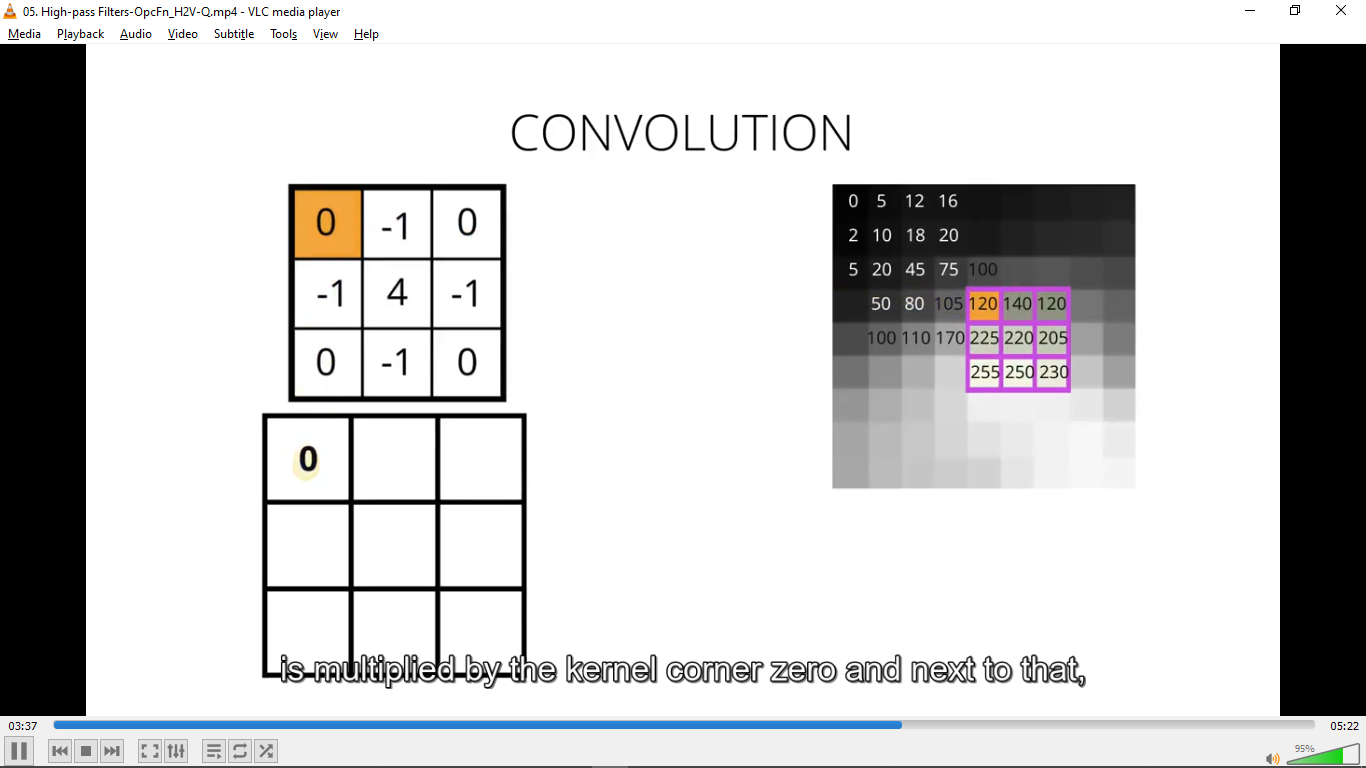

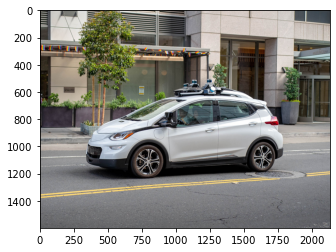

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

#read image
image=cv2.imread('driven cars.jpg')

#make a copy of the image
image_copy=np.copy(image)

#change color to rgb
image_copy=cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

# Convert the image to gray scale

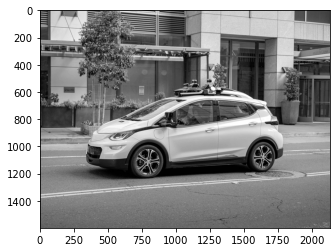

In [3]:
#change color to rgb
gray=cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap="gray")

# Create  a custom kernel

In [7]:
#3x3 array for detecting edges.
#sobel filter detects intereupt that intensity changes in the x and y seperately

sobel_x=np.array([[-1,0,1],
                [-2,0,2],
                [-1,0,1]
                ])

In [8]:
sobel_x

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [9]:
#perform convulotions
filtered_image=cv2.filter2D(gray,-1,sobel_x)

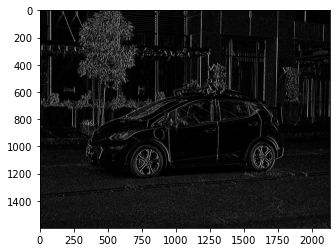

In [10]:
#all vertical edges are hilighted
plt.imshow(filtered_image,cmap="gray")

# Create a Binary image a treshhold that sets all filtered pixels to white

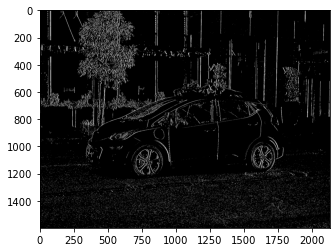

In [21]:
reval,binary_image=cv2.threshold(filtered_image,90,255,cv2.THRESH_BINARY)
plt.imshow(binary_image,cmap="gray")